# Exercise 03

## Data preparation and model evaluation exercise with credit scoring

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


Read the data into Pandas

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('../datasets/KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.io.parsers.read_table(f, sep=',')

data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [5]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [6]:
X.shape

(112915, 11)

# Exercise 3.1

Input the missing values of the Age and Number of Dependents 

In [7]:
# check for missing values
data.isnull().sum()

Unnamed: 0                                 0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [8]:
data.shape

(112915, 12)

In [9]:
# mean Age
data.age.mean()

51.36130439584714

In [10]:
data.age.fillna(data.age.median(), inplace=True)
data.NumberOfDependents.fillna(data.NumberOfDependents.median(), inplace=True)

In [11]:
data.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
5,5,0,0.213179,74.0,0.0,0.375607,3500.0,3.0,0.0,1.0,0.0,1.0
6,6,0,0.754464,39.0,0.0,0.209940,3500.0,8.0,0.0,0.0,0.0,0.0
7,7,0,0.189169,57.0,0.0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0
8,8,0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
9,9,0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0


In [12]:
data.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# Exercise 3.2

From the set of features

Select the features that maximize the **F1Score** the model using K-Fold cross-validation

In [13]:
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data.SeriousDlqin2yrs

In [14]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data.SeriousDlqin2yrs
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[  5.216e+04   7.935e+03   4.836e+03   5.764e+04   5.865e+01   1.448e+06
   5.396e+02   8.506e+04   8.778e+01   6.769e+04   3.853e+02]
[[  2.000e+00   9.120e+03   0.000e+00   0.000e+00]
 [  0.000e+00   2.600e+03   0.000e+00   0.000e+00]
 [  1.000e+00   3.042e+03   1.000e+00   0.000e+00]
 [  0.000e+00   3.300e+03   0.000e+00   0.000e+00]
 [  1.000e+00   6.359e+04   0.000e+00   0.000e+00]]


In [15]:
# define X and y
feature_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']
X = data[feature_cols]
y = data.SeriousDlqin2yrs

In [16]:
X.head(10)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
0,0.766127,45.0,2.0,9120.0,0.0,0.0
1,0.957151,40.0,0.0,2600.0,0.0,0.0
2,0.658180,38.0,1.0,3042.0,1.0,0.0
3,0.233810,30.0,0.0,3300.0,0.0,0.0
4,0.907239,49.0,1.0,63588.0,0.0,0.0
5,0.213179,74.0,0.0,3500.0,0.0,0.0
6,0.754464,39.0,0.0,3500.0,0.0,0.0
7,0.189169,57.0,0.0,23684.0,0.0,0.0
8,0.644226,30.0,0.0,2500.0,0.0,0.0
9,0.018798,51.0,0.0,6501.0,0.0,0.0


In [17]:
# Runnig the F1 Score using a logistic regresion 
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

/Users/jfrank/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

array([[26244,    71],
       [ 1813,   101]])

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))

precision_score  0.587209302326
recall_score     0.0527690700104


In [20]:
print('f1_score    ', f1_score(y_test, y_pred_class))

f1_score     0.0968360498562


# Exercise 3.3

Now which is the best set of features selected by AUC

Optimal number of features : 8


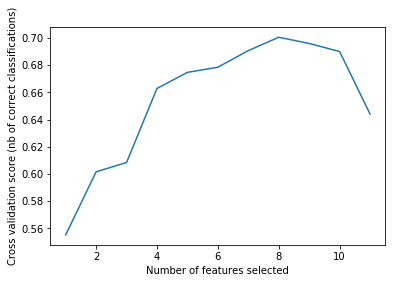

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

X = data.drop('SeriousDlqin2yrs', axis=1)
# Create the RFE object and compute a cross-validated score.
svc = LogisticRegression(C=1e9)
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='roc_auc')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()